# Radial Velocity and RV Uncertainty Data plots for '55 Cnc'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Use numpy to unpack and return data from text file to program
**USE THIS FUNCTION TO ACCESS DATA**

In [2]:
def read_data_from_txt(text_file):
    data_unpack = np.loadtxt(text_file,unpack=True,usecols=(0,1,2))
    return data_unpack

Create labeled arrays for each set of data and print

In [3]:
global_data_unpack = np.loadtxt('exoplanetinfo_copy.txt',unpack=True,usecols=(0,1,2))
#print(global_data_unpack)

In [4]:
def print_each_array(text_file):
    data_arrays = read_data_from_txt(text_file)
    hjd = data_arrays[0]
    rv = data_arrays[1]
    rv_uncertainty = data_arrays[2]
    
    print(f"HJD Array (Days): {hjd}")
    print(f"Radial Velocity (m/s): {rv}")
    print(f"Radial Velocity Uncertainty (m/s): {rv_uncertainty}")

Create two plots of the data

In [5]:
def plot_data(text_file):
    # set variables
    data_arrays = read_data_from_txt(text_file)
    hjd = data_arrays[0]
    rv = data_arrays[1]
    rv_uncertainty = data_arrays[2]
    # initialize figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5)) #sharey=True
    
    # create first subplot
    ax1.scatter(hjd, rv, color='blue', marker='+', label='Radial Velocity')
    ax1.set_ylabel('Radial Velocity (m/s)')
    ax1.set_xlabel('HJD (Days)')
    ax1.legend()
    ax1.set_title("'55 Cnc' Radial Velocity over HJD")
    
    # set first subplot y limit
    ax1.set_ylim(-150, 150)
    ax1.set_yticks(np.arange(-150, 151, 50))
    
    # create second subplot
    ax2.scatter(hjd, rv_uncertainty, color='red', marker='+', label='RV Uncertainty')
    ax2.set_ylabel('Radial Velocity Uncertainty (m/s)')
    ax2.set_xlabel('HJD (Days)')
    ax2.legend()
    ax2.set_title("'55 Cnc' Radial Velocity Uncertainty over HJD")
    
    # set second subplot y limit
    ax2.set_ylim(0, 5)
    ax2.set_yticks(np.arange(0, 6, 1))
    
    ax1.grid(True)
    ax2.grid(True)
    
    plt.tight_layout()

    plt.savefig('55_cnc_data_plots.pdf')
    
    plt.show()

In [6]:
#print(read_data_from_txt('exoplanetinfo_copy.txt'))

In [7]:
print_each_array('exoplanetinfo_copy.txt')

HJD Array (Days): [2449676.0632  2449767.77441 2449768.83203 2449793.79785 2450056.98828
 2450087.88184 2450088.91894 2450089.00586 2450089.77637 2450089.98633
 2450090.74512 2450090.89258 2450091.84863 2450091.96973 2450120.87243
 2450121.88866 2450124.85765 2450125.77783 2450126.83752 2450127.85104
 2450128.86732 2450144.71034 2450144.85357 2450145.625   2450145.76465
 2450148.88742 2450150.74885 2450152.66281 2450168.74902 2450171.73959
 2450172.68686 2450173.72485 2450179.73422 2450180.68848 2450181.63379
 2450186.73954 2450187.68636 2450199.68319 2450200.70104 2450201.68663
 2450202.68868 2450203.68772 2450214.68668 2450215.67357 2450233.69028
 2450422.00586 2450437.92852 2450441.9541  2450502.78136 2450503.76303
 2450504.77366 2450536.77162 2450537.7645  2450550.72661 2450563.71983
 2450614.69333 2450793.90234 2450794.96191 2450831.93164 2451153.0332
 2451155.01856 2451206.87793 2451212.92549 2451213.88293 2451242.74023
 2451298.72157 2451305.70801 2451469.05273 2451532.99609 245

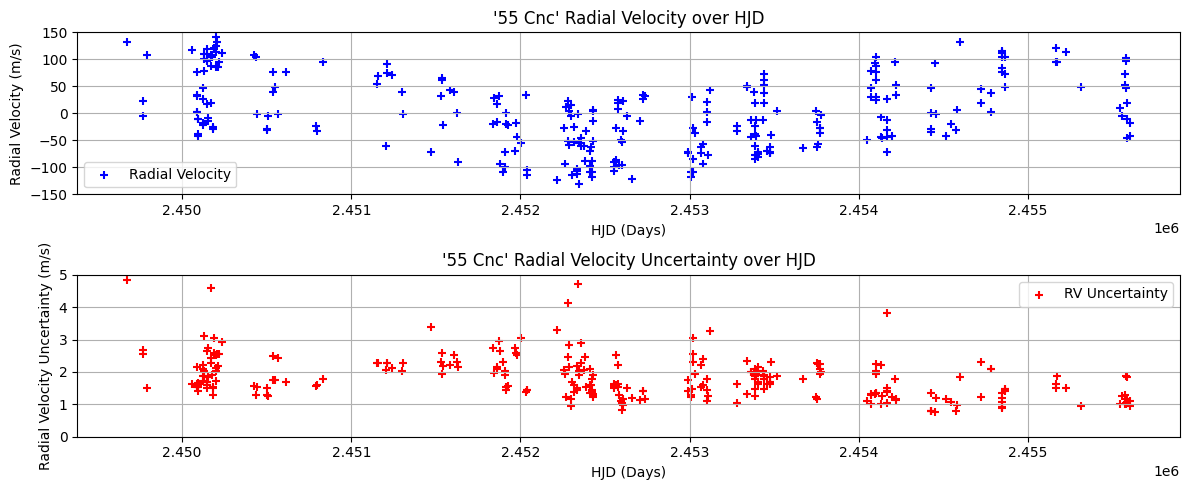

In [8]:
plot_data('exoplanetinfo_copy.txt')

In [9]:
from scipy import optimize
from scipy import interpolate
from astropy.table import Table

In [10]:
#global_data_unpack[0] = x or HJD (Days)
#global_data_unpack[1] = y1 or rv
#global_data_unpack[2] = y2 or rv_uncertainty

#NEED TO MODIFY

def f_curve(x, a, b, c, d):
    """
    Describes the basic sine function.
    """
    return a * np.sin(2.0 * np.pi*(x - b) / c) + d

v_shift = np.mean(global_data_unpack[1]) #this is the most accurate vertical shift possible
                     #defined early to be accessed in later instantiations

amplitude = np.mean(np.abs(global_data_unpack[1])) + v_shift #defines the amplitude to be the mean of y where all values are set to be >= 0
                               #the advantage of this amplitude is that it is definitively the least far away amplitude if dealing with a lot of outliers
#amplitude = np.std(np.abs(global_data_unpack[1])) - v_shift

h_shift = -8*((np.max(global_data_unpack[0]) - np.min(global_data_unpack[0]))/100)
  #to find this value, we should try and find the location where x is closest to the vertical shift

period = 4700
initial_guess = [amplitude, h_shift, period, v_shift]
print(h_shift)
print(amplitude)
print(np.std(global_data_unpack[1]))

params, params_cov = optimize.curve_fit(f_curve, global_data_unpack[0], global_data_unpack[1], sigma = global_data_unpack[2], absolute_sigma = True,
                                       p0 = initial_guess)

-474.2192671999708
56.55306289622202
67.06616160864814


Fitted parameters: [ 4.81950106e+01 -5.73999634e+02  4.70204179e+03 -1.64882145e+00]


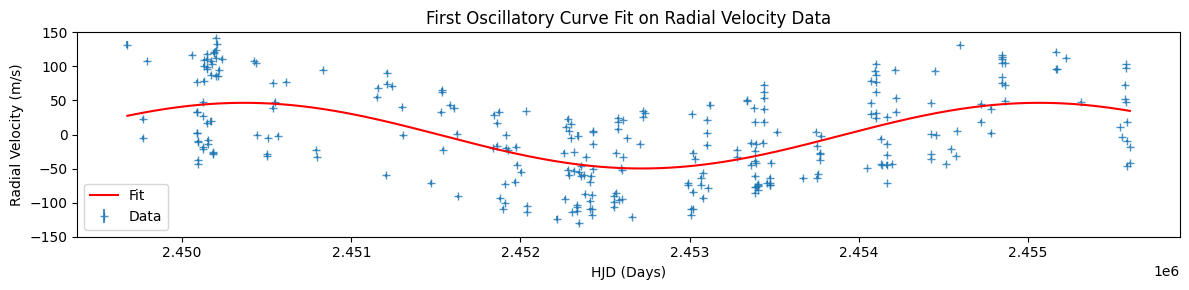

In [11]:
#THIS CODE DOES NOT WORK PLEASE FIX

#in particularly difficult cases, we can also provide the boundaries to explore parameter ranges
#The bounds are set to be adaptive to our guesses so we don't need to rewrite them every time

rfe = 100 #defines the room for error
        #Should be a positive value

low_bound = [np.ceil(initial_guess[0]) - rfe, np.ceil(initial_guess[1]) - rfe, np.ceil(initial_guess[2]) - rfe, np.ceil(initial_guess[3]) - rfe]
    #Sets every value in the initial guess to be mapped to the ceiling of the value at the given index -1
high_bound = [np.floor(initial_guess[0]) + rfe, np.floor(initial_guess[1]) + rfe, np.floor(initial_guess[2]) + rfe, np.floor(initial_guess[3]) + rfe]
    #Sets every value in the initial guess to be mapped to the floor of the value at the given index +1
params, params_cov = optimize.curve_fit(f_curve, global_data_unpack[0], global_data_unpack[1], sigma = global_data_unpack[2], absolute_sigma = True,
                                       p0 = initial_guess, bounds = (low_bound, high_bound))
print(f"Fitted parameters: {params}")
coefficients1 = (params[0], params[1], params[2], params[3])

#let's see how the best fit model looks by plotting it, along with the data
x_fit = np.linspace(np.min(global_data_unpack[0]), np.max(global_data_unpack[0]), 500)
y_fit = f_curve(x_fit, *params) #providing '*params' is called 'unpacking' and is identical to write
                                # 'params[0], params[1], params[2]...'

fig = plt.subplots(1, 1, figsize=(12,3))

plt.errorbar(global_data_unpack[0], global_data_unpack[1], global_data_unpack[2], fmt='+', label = 'Data', alpha=0.8, zorder = 1) #data
plt.plot(x_fit, y_fit, 'r-', label='Fit', zorder = 2)

plt.ylabel('Radial Velocity (m/s)')
plt.xlabel('HJD (Days)')
plt.legend()
plt.title("First Oscillatory Curve Fit on Radial Velocity Data")

# set first subplot y limit
plt.ylim(-150, 150)
plt.yticks(np.arange(-150, 151, 50))

plt.tight_layout()
plt.savefig('FirstCurveFit.pdf')
plt.show()

In [12]:
# Task 4: Obtain the residuals by subtracting the best fit function from the actual radial veocity data
def residuals(x, y):
    return y - f_curve(x, *params)

# Store the residuals
data_residuals = residuals(global_data_unpack[0], global_data_unpack[1])

#fig, ax = plt.subplots(1, 1, figsize=(12,12))  # Using larger height to be able to see errorbars
#ax.set_xlabel('HJD (days)')
#ax.set_ylabel('Residual Radial Velocity (m/s)')
#ax.errorbar(global_data_unpack[0], data_residuals, yerr=global_data_unpack[2], fmt='+')

<ErrorbarContainer object of 3 artists>

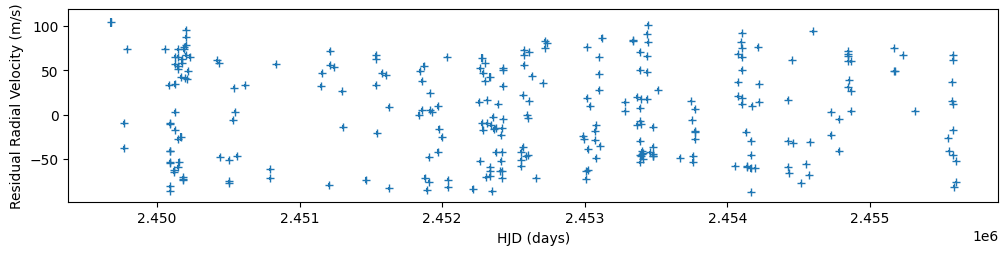

In [13]:
# Task 4: Plot the residuals graph smaller in height so we can see the new sinusoidal trend

fig, ax = plt.subplots(1, 1, figsize=(12,2.5))
ax.set_xlabel('HJD (days)')
ax.set_ylabel('Residual Radial Velocity (m/s)')
ax.errorbar(global_data_unpack[0], data_residuals, yerr=global_data_unpack[2], fmt='+')

In [14]:
# Task 4: Determine the standard deviation of the residuals
print(np.mean(data_residuals))
print(np.std(data_residuals))

1.8048726972158897
52.24551327854055


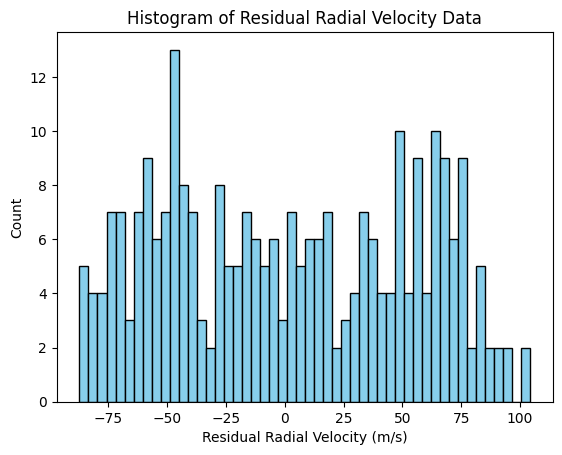

In [15]:
# Task 4: Plot the histogram of the residual radial velocity
bins = 50  # TODO Is this reasonable
plt.hist(data_residuals, bins=bins, edgecolor='black', color='skyblue')
plt.xlabel('Residual Radial Velocity (m/s)')
plt.ylabel('Count')
plt.title("Histogram of Residual Radial Velocity Data")
plt.savefig('ResidualRadialVelocityHistogram.pdf', bbox_inches='tight', dpi=600)

In [16]:
# Task 4: Compare the scatter in the residuals with the uncertainties
print(f"The mean of the residual radial velocity: {np.mean(data_residuals)}")
print(f"The standard deviation of the residual radial velocity: {np.std(data_residuals)}")
print()
print(f"The mean of the radial velocity uncertainty: {np.mean(global_data_unpack[2])}")
print(f"The standard deviation of the radial velocity uncertainty: {np.std(global_data_unpack[2])}")

The mean of the residual radial velocity: 1.8048726972158897
The standard deviation of the residual radial velocity: 52.24551327854055

The mean of the radial velocity uncertainty: 1.8060667343065693
The standard deviation of the radial velocity uncertainty: 0.6427887768668138


In [17]:
print(f"The standard deviation of the residual radial velocity is much higher (about 10x) than the radial velocity uncertainty.")
print(f"Therefore, the data indicates another planet.")

The standard deviation of the residual radial velocity is much higher (about 10x) than the radial velocity uncertainty.
Therefore, the data indicates another planet.


In [18]:
from scipy.optimize import curve_fit

1.8048726972158897
47.72045770532316
Fitted parameters: [7.00000000e+01 2.45332589e+06 1.32025595e+01 1.09620562e+00]
Fitted params error
: [1.41302658e-01 3.70365735e-03 3.09979635e-05 9.38089555e-02]


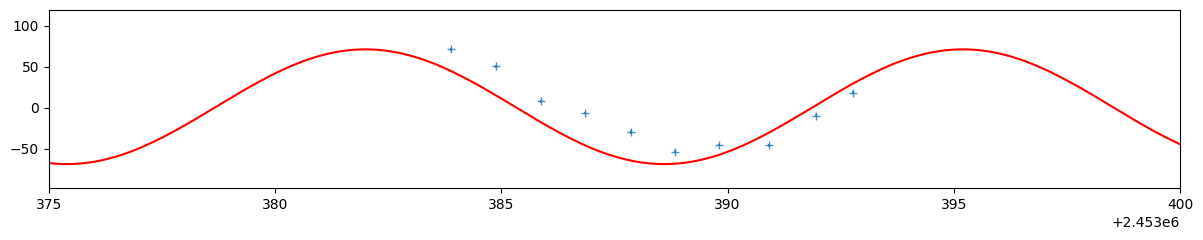

In [19]:
# Task 5: Find a second planet
v_shift2 = np.mean(data_residuals)
amplitude2 = np.mean(np.abs(data_residuals)) + v_shift2
h_shift2 = 2.4508 * (10**6)
period2 = (2.4535-2.4512) * (10**6)
#initial_guess2 = [amplitude2, h_shift2, period2, v_shift2]
initial_guess2 = [75, 2453322, 13.209, v_shift2]
print(v_shift2)
print(amplitude2)
rfe2 = 5
low_bound2 = [np.ceil(initial_guess2[0]) - rfe2, np.ceil(initial_guess2[1]) - rfe2, np.ceil(initial_guess2[2]) - rfe2, np.ceil(initial_guess2[3]) - rfe2]
high_bound2 = [np.floor(initial_guess2[0]) + rfe2, np.floor(initial_guess2[1]) + rfe2, np.floor(initial_guess2[2]) + rfe2, np.floor(initial_guess2[3]) + rfe2]

params2, params_cov2 = optimize.curve_fit(f_curve, global_data_unpack[0], data_residuals, sigma = global_data_unpack[2], absolute_sigma = True,
                                          p0 = initial_guess2, bounds = (low_bound2, high_bound2))
print(f"Fitted parameters: {params2}")
#print(f"Fitted covariances\n: {params_cov2}")
params_err2 = np.sqrt(np.diag(params_cov2))
print(f"Fitted params error\n: {params_err2}")

coefficients2 = (params2[0], params2[1], params2[2], params2[3])

x_fit2 = np.linspace(np.min(global_data_unpack[0]), np.max(global_data_unpack[0]), 50000)
y_fit2 = f_curve(x_fit2, *params2)

fig = plt.subplots(1, 1, figsize=(12,2.5))

plt.errorbar(global_data_unpack[0], data_residuals, global_data_unpack[2], fmt='+', label = 'Data', alpha=0.8, zorder = 1)
plt.plot(x_fit2, y_fit2, 'r-', label='Fit', zorder = 2)

plt.tight_layout()
plt.xlim(2.453375e6, 2.453400e6) # SHOWS WELL
#plt.xlim(2.454100e6, 2.454300e6) 
plt.show()

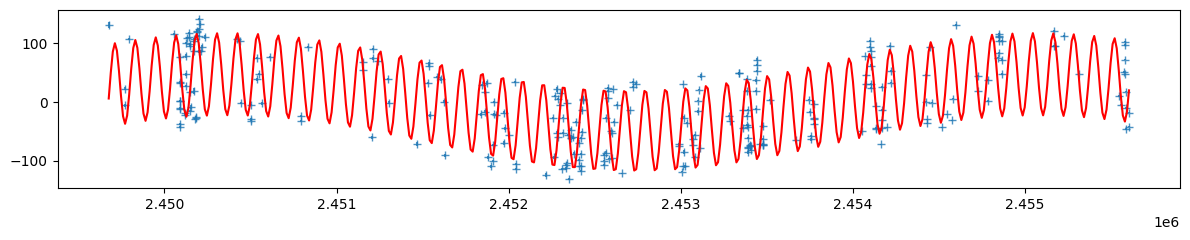

In [20]:
#let's see how the two planet fit looks by plotting it, along with the data
x_fit = np.linspace(np.min(global_data_unpack[0]), np.max(global_data_unpack[0]), 500)
y_fit = f_curve(x_fit, *coefficients1) + f_curve(x_fit, *coefficients2)

fig = plt.subplots(1, 1, figsize=(12,2.5))

plt.errorbar(global_data_unpack[0], global_data_unpack[1], global_data_unpack[2], fmt='+', label = 'Data', alpha=0.8, zorder = 1) #data
plt.plot(x_fit, y_fit, 'r-', label='Fit', zorder = 2)

plt.tight_layout()
plt.show()

<ErrorbarContainer object of 3 artists>

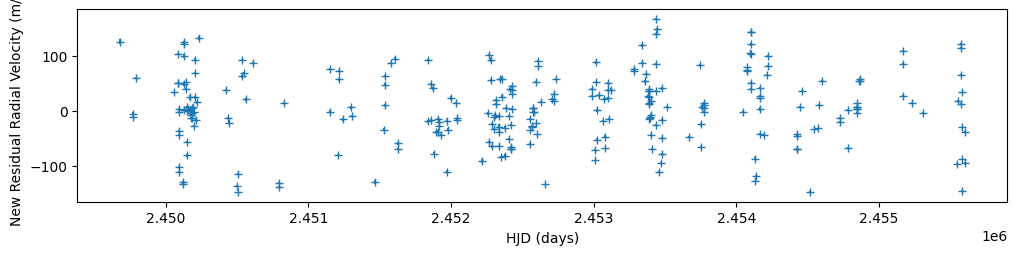

In [21]:
# Task 5: Obtain the new residuals
def new_residuals(x, y):
    return y - f_curve(x, *params2)
# Store the new residuals
new_data_residuals = new_residuals(global_data_unpack[0], data_residuals)
fig, ax = plt.subplots(1, 1, figsize=(12,2.5))
ax.set_xlabel('HJD (days)')
ax.set_ylabel('New Residual Radial Velocity (m/s)')
ax.errorbar(global_data_unpack[0], new_data_residuals, yerr=global_data_unpack[2], fmt='+')

4.493798045434365
63.36781751510192


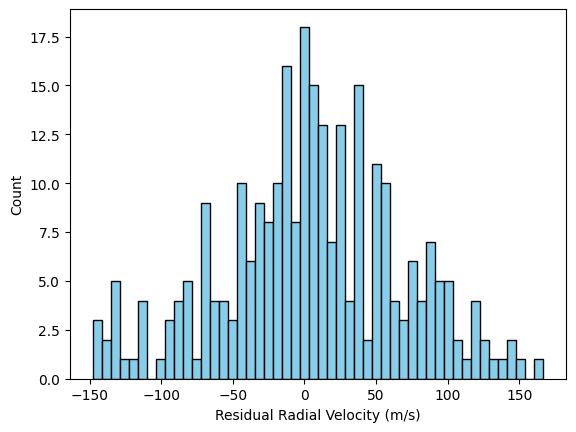

In [22]:
# Task 5: Determine the standard deviation of the residuals and plot histogram
print(np.mean(new_data_residuals))
print(np.std(new_data_residuals))

bins = 50  # TODO Is this reasonable
plt.hist(new_data_residuals, bins=bins, edgecolor='black', color='skyblue')
plt.xlabel('Residual Radial Velocity (m/s)')
plt.ylabel('Count')

plt.savefig('NewResidualRadialVelocityHistogram.pdf', bbox_inches='tight', dpi=600)

4.493798045434365
Fitted parameters: [1.27727160e+01 2.45000495e+06 4.48506561e+01 1.50005703e+01]
Fitted covariances
: [[ 1.84242775e-02  1.20556035e-03 -1.96101313e-05 -3.07323145e-05]
 [ 1.20556035e-03  2.66071088e-02 -3.09359436e-04  2.36670405e-03]
 [-1.96101313e-05 -3.09359436e-04  4.43720935e-06 -2.46878619e-05]
 [-3.07323145e-05  2.36670405e-03 -2.46878619e-05  8.75616439e-03]]
Fitted params error
: [0.13573606 0.16311686 0.00210647 0.09357438]


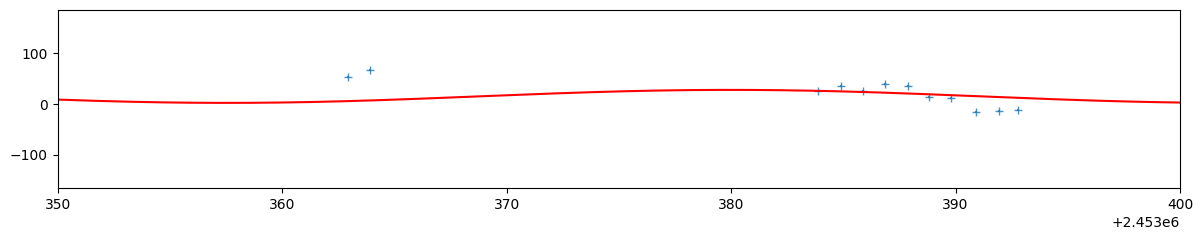

In [23]:
# Task 5: Find a third planet
v_shift3 = np.mean(new_data_residuals)
#amplitude2 = np.mean(np.abs(data_residuals)) + v_shift2
#h_shift2 = 2.4508 * (10**6)
#period2 = (2.4535-2.4512) * (10**6)
#initial_guess2 = [amplitude2, h_shift2, period2, v_shift2]
initial_guess3 = [10.5, 2.450e6, 45, 20]
#initial_guess3 = [65, 2.4558e6, 9.5, v_shift3]
print(v_shift3)
#print(amplitude3)
rfe3 = 5
low_bound3 = [np.ceil(initial_guess3[0]) - rfe3, np.ceil(initial_guess3[1]) - rfe3, np.ceil(initial_guess3[2]) - rfe3, np.ceil(initial_guess3[3]) - rfe3]
high_bound3 = [np.floor(initial_guess3[0]) + rfe3, np.floor(initial_guess3[1]) + rfe3, np.floor(initial_guess3[2]) + rfe3, np.floor(initial_guess3[3]) + rfe3]

params3, params_cov3 = optimize.curve_fit(f_curve, global_data_unpack[0], new_data_residuals, sigma = global_data_unpack[2], absolute_sigma = True,
                                          p0 = initial_guess3, bounds = (low_bound3, high_bound3))
print(f"Fitted parameters: {params3}")
print(f"Fitted covariances\n: {params_cov3}")
params_err3 = np.sqrt(np.diag(params_cov3))
print(f"Fitted params error\n: {params_err3}")

coefficients3 = (params3[0], params3[1], params3[2], params3[3])

x_fit3 = np.linspace(np.min(global_data_unpack[0]), np.max(global_data_unpack[0]), 50000)
y_fit3 = f_curve(x_fit3, *params3)

fig = plt.subplots(1, 1, figsize=(12,2.5))

plt.errorbar(global_data_unpack[0], new_data_residuals, global_data_unpack[2], fmt='+', label = 'Data', alpha=0.8, zorder = 1)
plt.plot(x_fit3, y_fit3, 'r-', label='Fit', zorder = 2)

plt.tight_layout()
plt.xlim(2.453350e6, 2.453400e6)

# initial_guess3 = [40, 2.450e6, 20, 20] &
# plt.xlim(2.453350e6, 2.453400e6)

# For new amplitude and period
#plt.xlim(2.45015e6, 2.45025e6)

# For old amplitude and period
#plt.xlim(2.45010e6, 2.45015e6)
#plt.xlim(2.45005e6, 2.45010e6)
#plt.xlim(2.45346e6, 2.45349e6)
plt.show()

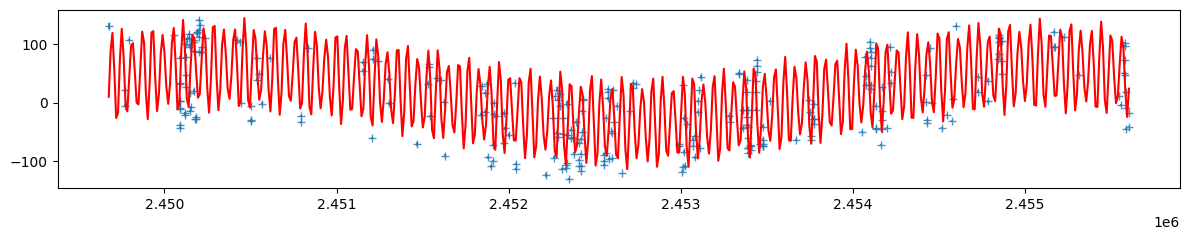

In [24]:
#let's see how the three planet fit looks by plotting it, along with the data
x_fit = np.linspace(np.min(global_data_unpack[0]), np.max(global_data_unpack[0]), 550)
y_fit = f_curve(x_fit, *coefficients1) + f_curve(x_fit, *coefficients2) + f_curve(x_fit, *coefficients3)

fig = plt.subplots(1, 1, figsize=(12,2.5))

plt.errorbar(global_data_unpack[0], global_data_unpack[1], global_data_unpack[2], fmt='+', label = 'Data', alpha=0.8, zorder = 1) #data
plt.plot(x_fit, y_fit, 'r-', label='Fit', zorder = 2)

#plt.xlim(2.452e6, 2.4525e6)
plt.tight_layout()
plt.show()

In [25]:
def calculate_exoplanet_mass(K, P, Ms):
    return (K / 28.4) * ((P / 365)**(1/3)) * ((Ms)**(2/3))
    
A1 = coefficients1[0]
P1 = coefficients1[2]

A2 = coefficients2[0]
P2 = coefficients2[2]

A3 = coefficients3[0]
P3 = coefficients3[2]

Mcnc = 0.905 # Mass of 55 CNC A (main star of the system)
mass1 = calculate_exoplanet_mass(np.abs(A1), P1, Mcnc)
mass2 = calculate_exoplanet_mass(np.abs(A2), P2, Mcnc)
mass3 = calculate_exoplanet_mass(np.abs(A3), P3, Mcnc)

print("Planet 1:")
print(f"\tAmplitude = {A1:.2f} m/s")
print(f"\tPeriod = {P1:.2f} days")
print(f"\tMass = {mass1:.3f} Jupiter mass")

print("Planet 2:")
print(f"\tAmplitude = {A2:.2f} m/s")
print(f"\tPeriod = {P2:.2f} days")
print(f"\tMass = {mass2:.3f} Jupiter mass")

print("Planet 3:")
print(f"\tAmplitude = {A3:.2f} m/s")
print(f"\tPeriod = {P3:.2f} days")
print(f"\tMass = {mass3:.3f} Jupiter mass")

# Check if the calculated period lies within 20% of the 
# known period to identify the planet
def identify_planet(P):
    if abs(P - 0.7365) < (0.2 * 0.74):
        return "Could be 55 Cancri e"
    elif abs(P - 14.65) < (0.2 * 14.65):
        return "Could be 55 Cancri b"
    elif abs(P - 44.40) < (0.2 * 44.40):
        return "Could be 55 Cancri c"
    elif abs(P - 260.0) < (0.2 * 260.0):
        return "Could be 55 Cancri f"
    elif abs(P - 5574) < (0.2 * 5574):
        return "Could be 55 Cancri d" 
    else:
        return "Unknown Cancri planet"

print(f"Planet 1: {identify_planet(P1)}")
print(f"Planet 2: {identify_planet(P2)}")
print(f"Planet 3: {identify_planet(P3)}")

Planet 1:
	Amplitude = 48.20 m/s
	Period = 4702.04 days
	Mass = 3.722 Jupiter mass
Planet 2:
	Amplitude = 70.00 m/s
	Period = 13.20 days
	Mass = 0.763 Jupiter mass
Planet 3:
	Amplitude = 12.77 m/s
	Period = 44.85 days
	Mass = 0.209 Jupiter mass
Planet 1: Could be 55 Cancri d
Planet 2: Could be 55 Cancri b
Planet 3: Could be 55 Cancri c


In [26]:
# Assume x = time (HJD), y = radial velocity, y_err = uncertainty
def plot_data(text_file):
    # set variables
    data_arrays = read_data_from_txt(text_file)
    hjd = data_arrays[0]
    rv = data_arrays[1]
    rv_uncertainty = data_arrays[2]
    # initialize figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5)) #sharey=True

hjd, rv, rv_uncertainty = read_data_from_txt('exoplanetinfo_copy.txt')

# Define two-planet model
def two_planet_model(t, A1, phi1, P1, A2, phi2, P2, offset):
    term1 = A1 * np.sin(2 * np.pi * (t - phi1) / P1)
    term2 = A2 * np.sin(2 * np.pi * (t - phi2) / P2)
    return term1 + term2 + offset

# From Step 4
initial_guess = [
    55.43, 24500.0, 67.07,   # Planet 1
    30.0, 2460000.0, 44.3,   # Planet 2 (rough estimate)
    0.0                     # Offset
]

# Fit the model to the data
params, covariance = curve_fit(
    two_planet_model, hjd, rv, sigma=rv_uncertainty,
    absolute_sigma=True, p0=initial_guess, maxfev=20000
)

# Unpack results
A1, phi1, P1, A2, phi2, P2, offset = params
print(f"Planet 1: Amplitude = {A1:.2f} m/s, Period = {P1:.2f} days")
print(f"Planet 2: Amplitude = {A2:.2f} m/s, Period = {P2:.2f} days")

Planet 1: Amplitude = -27.82 m/s, Period = 67.18 days
Planet 2: Amplitude = 19.74 m/s, Period = 44.69 days


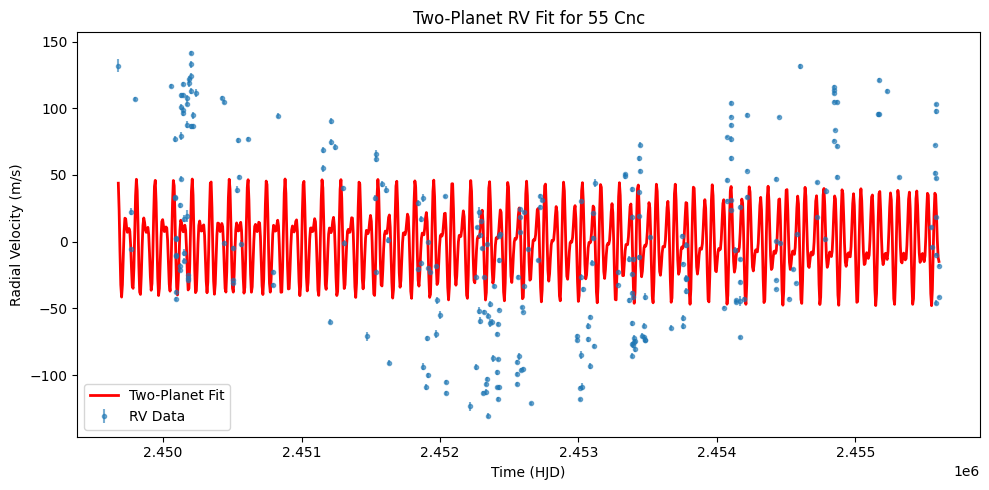

In [27]:
# Plot fit
x_fit = np.linspace(np.min(hjd), np.max(hjd), 1000)
y_fit = two_planet_model(x_fit, *params)

plt.figure(figsize=(10, 5))
plt.errorbar(hjd, rv, yerr=rv_uncertainty, fmt='o', markersize=3, label='RV Data', alpha=0.6)
plt.plot(x_fit, y_fit, 'r-', label='Two-Planet Fit', linewidth=2)
plt.xlabel("Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Two-Planet RV Fit for 55 Cnc")
plt.legend()
plt.tight_layout()
plt.savefig("55Cnc_TwoPlanetFit.pdf")
plt.show()

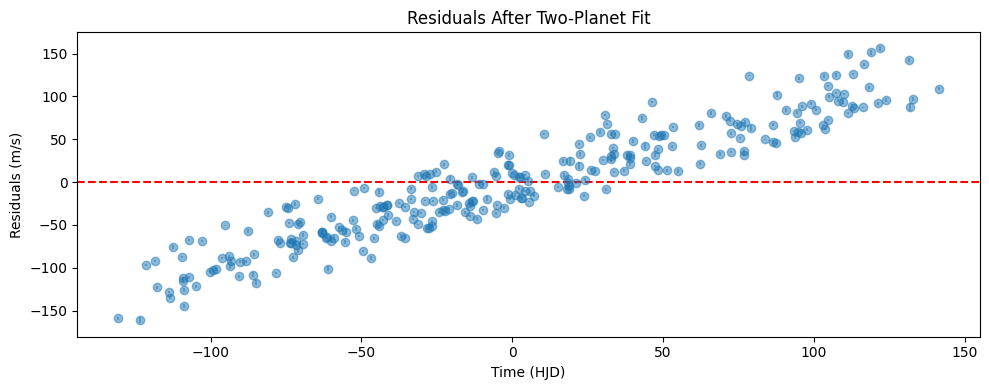

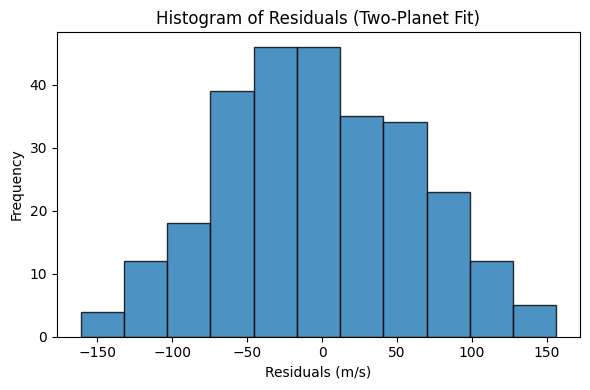

Standard deviation of residuals: 64.99459087530663
Mean measurement uncertainty: 1.8060667343065693


In [28]:
# Residuals
residuals = rv - two_planet_model(hjd, *params)

plt.figure(figsize=(10, 4))
plt.errorbar(rv, residuals, yerr=rv_uncertainty, fmt='o', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Time (HJD)")
plt.ylabel("Residuals (m/s)")
plt.title("Residuals After Two-Planet Fit")
plt.tight_layout()
plt.savefig("55Cnc_TwoPlanetResiduals.pdf")
plt.show()

# Histogram of residuals
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins='auto', edgecolor='black', alpha=0.8)
plt.xlabel("Residuals (m/s)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Two-Planet Fit)")
plt.tight_layout()
plt.savefig("55Cnc_TwoPlanet_Histogram.pdf")
plt.show()

# Std deviation comparison
print("Standard deviation of residuals:", np.std(residuals))
print("Mean measurement uncertainty:", np.mean(rv_uncertainty))

In [29]:
def estimate_planet_mass_old(K, P, M_star=0.905):
    """
    Estimate the minimum planet mass (M_p sin(i)) in Jupiter masses.
    K: RV semi-amplitude in m/s
    P: Orbital period in days
    M_star: Stellar mass in solar masses (default 55 Cnc = 0.905)
    """
    return (np.abs(K) * (P ** (1/3)) * (M_star ** (2/3))) / 28.4329

# Calculate masses using absolute value of amplitude
mass1 = estimate_planet_mass_old(np.abs(A1), P1)
mass2 = estimate_planet_mass_old(np.abs(A2), P2)

# Print full results
print("Planet 1:")
print(f"  Period = {P1:.2f} days")
print(f"  Amplitude = {A1:.2f} m/s")
print(f"  Estimated Mass = {mass1:.3f} M_Jup")

print("Planet 2:")
print(f"  Period = {P2:.2f} days")
print(f"  Amplitude = {A2:.2f} m/s")
print(f"  Estimated Mass = {mass2:.3f} M_Jup")

# Basic interpretation
def match_known_planet(P):
    if abs(P - 14.65) < 1:
        return "Likely 55 Cnc b (Hot Jupiter)"
    elif abs(P - 44.4) < 2:
        return "Likely 55 Cnc c (Neptune-like)"
    elif abs(P - 0.74) < 0.1:
        return "Possibly 55 Cnc e (Super-Earth)"
    elif abs(P - 260) < 10:
        return "Possibly 55 Cnc f (outer planet)"
    elif abs(P - 5170) < 100:
        return "Possibly 55 Cnc d (very distant Jupiter)" 
    else:
        return "Unknown — might be a third planet or fit artifact"

print("Interpretation:")
print(f"Planet 1: {match_known_planet(P1)}")
print(f"Planet 2: {match_known_planet(P2)}")


Planet 1:
  Period = 67.18 days
  Amplitude = -27.82 m/s
  Estimated Mass = 3.721 M_Jup
Planet 2:
  Period = 44.69 days
  Amplitude = 19.74 m/s
  Estimated Mass = 2.305 M_Jup
Interpretation:
Planet 1: Unknown — might be a third planet or fit artifact
Planet 2: Likely 55 Cnc c (Neptune-like)
